# Assignment

The goal of this assignment is to understand and implement different types of regression and classification algorithms using Python. The specific algorithms to be used are:

### Algorithms: 
* Regression 
* Logistic Regression 
* Naive Bayes

### Tasks: 
1. Perform EDA on the dataset and pre-processing if necessary.
2. Train a linear regression , logistic regression and naive bayes model using the dataset.
3. Evaluate the model's performance using appropriate metrics (e.g. accuracy, precision, recall, etc.).
4. Use the trained model to make predictions on unseen data.
5. Compare the perfomance of Linear Regression, Logistic Regression and Naive Bayes.
6. Analyze the results and draw conclusions.


### DATASET - *AI4I 2020 Predictive Maintenance*

#### Description

The AI4I 2020 Predictive Maintenance Dataset is a synthetic dataset that reflects real predictive maintenance data encountered in industry. Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in industry to the best of our knowledge.

#### Attribute Information:

The dataset consists of 10000 data points stored as rows with 14 features in columns

- UID: unique identifier ranging from 1 to 10000
- product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
- air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
- process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
- rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
- torque [Nm]: torque values are normally distributed around 40 Nm with a f = 10 Nm and no negative values.
- tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
- 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

The machine failure consists of five independent failure modes :

- tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200-240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).

- heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.
- power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
- overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
- random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail


# Inputs 
- UID
- Product ID
- Air temperature [K]
- Process temperature [K]
- Rotational speed [rpm]
- Torque [Nm]
- Tool wear [min]

# Output
- Machine failure (1 = failed, 0 = not failed)


Dataset Link: https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

### Submission

Kindly play around with the exploratory data analysis and model building. You can also try to improve the model's performance by tuning the hyperparameters.

Submit your assignment as a Jupyter notebook on your GitHub repository. The notebook should contain all the code and outputs. You can also submit a PDF version of the notebook. 

 





In [42]:
# Load the data from the file 'ai4i2020.csv' into a Pandas DataFrame

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
# Preprocess the data

df.describe()


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

## Exploratory Data Analysis

- The dataset has 10000 rows and 14 columns and we perform EDA on the dataset to understand the data better by checking for missing values, outliers, and other anomalies in the data.There is no missing value or duplicate value in the dataset.

- The dataset has 7 numerical columns and 7 categorical columns. The numerical columns are 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'UID'. The categorical columns are 'Product ID', 'Machine failure', 'Tool wear failure', 'Heat dissipation failure', 'Power failure', 'Overstrain failure', 'Random failure'.

- We check for outliers in the numerical columns using boxplots. We find that there are outliers in the 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]' columns. We remove the outliers using the IQR method.

- Convert the categorical columns to numerical columns using label encoding.

In [5]:
# Check for duplicate values and drop them
print("Checking for duplicate values: ", df.duplicated().sum() != 0)


Checking for duplicate values:  False


In [6]:
# set the numeric columns data type to float

df['Process temperature [K]'] = df['Process temperature [K]'].astype(float)
df['Rotational speed [rpm]'] = df['Rotational speed [rpm]'].astype(float)
df['Torque [Nm]'] = df['Torque [Nm]'].astype(float)
df['Tool wear [min]'] = df['Tool wear [min]'].astype(float)
df['Machine failure'] = df['Machine failure'].astype(float)


ds = df["Type"].value_counts().reset_index()[:28]
ds





,index,Type
0,L,6000
1,M,2997
2,H,1003


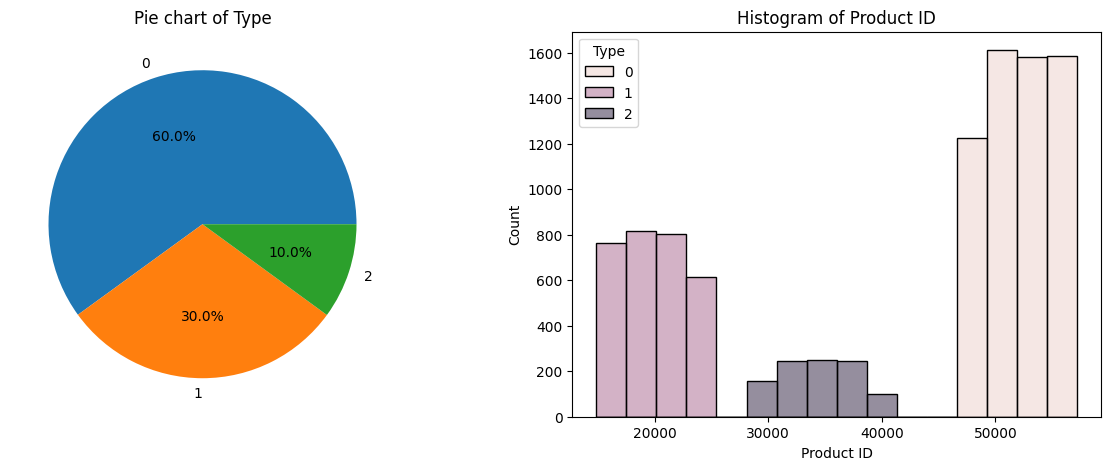

In [7]:
# Remove first character and set to numeric dtype
df['Product ID'] = df['Product ID'].apply(lambda x: x[1:])
df['Product ID'] = pd.to_numeric(df['Product ID'])


# Convert the Type column M,L,H to 0,1,2
df['Type'] = df['Type'].apply(lambda x: 0 if x == 'L' else 1 if x == 'M' else 2)



# Show both plots in the same figure using subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].pie(df['Type'].value_counts(), labels=df['Type'].value_counts().index, autopct='%1.1f%%')
ax[0].set_title('Pie chart of Type')
sns.histplot(data=df, x='Product ID', hue='Type', ax=ax[1])
ax[1].set_title('Histogram of Product ID')
plt.show()





In [8]:

# Drop the UDI and Product ID column as it is not needed for the model training
df_ = df.copy()
df = df_.drop(['UDI', 'Product ID'], axis=1)

# Check for missing values
df.isnull().sum()

# Print count of Unique values of each column
for col in df.columns:
    print(col, df[col].nunique())

Type 3
Air temperature [K] 93
Process temperature [K] 82
Rotational speed [rpm] 941
Torque [Nm] 577
Tool wear [min] 246
Machine failure 2
TWF 2
HDF 2
PWF 2
OSF 2
RNF 2


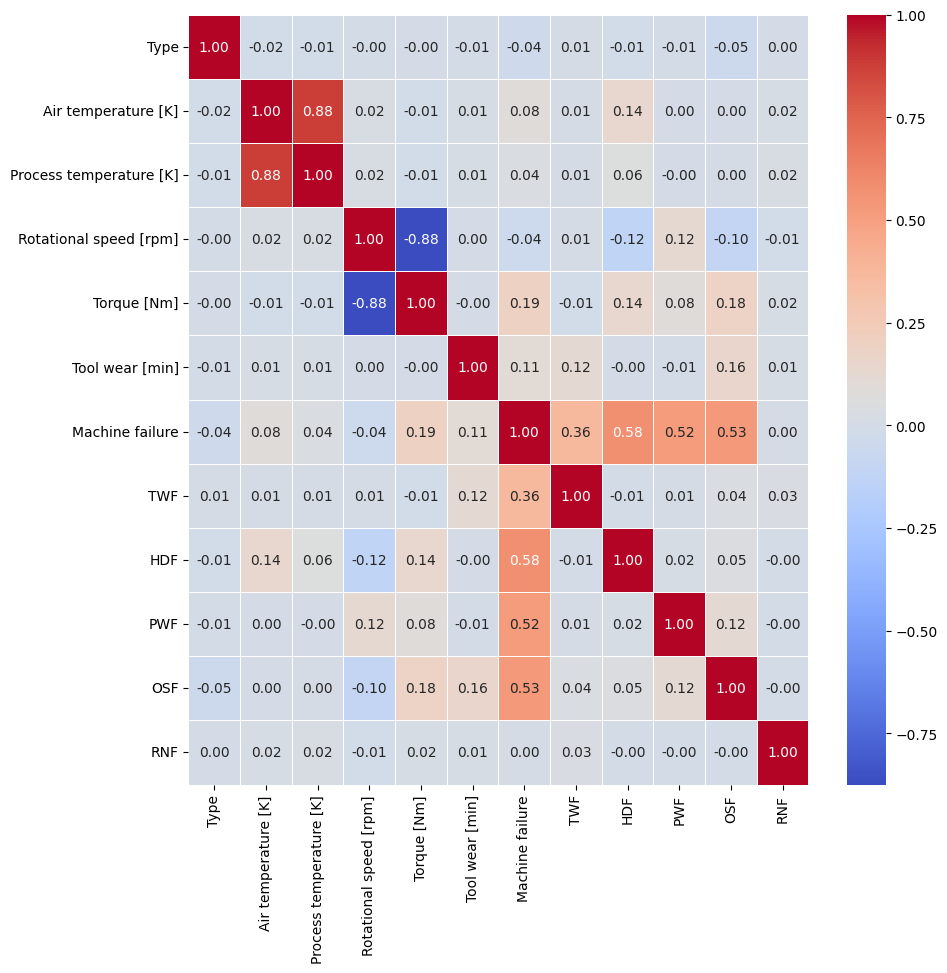

In [9]:
# Plot the correlation matrix 

corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.show()


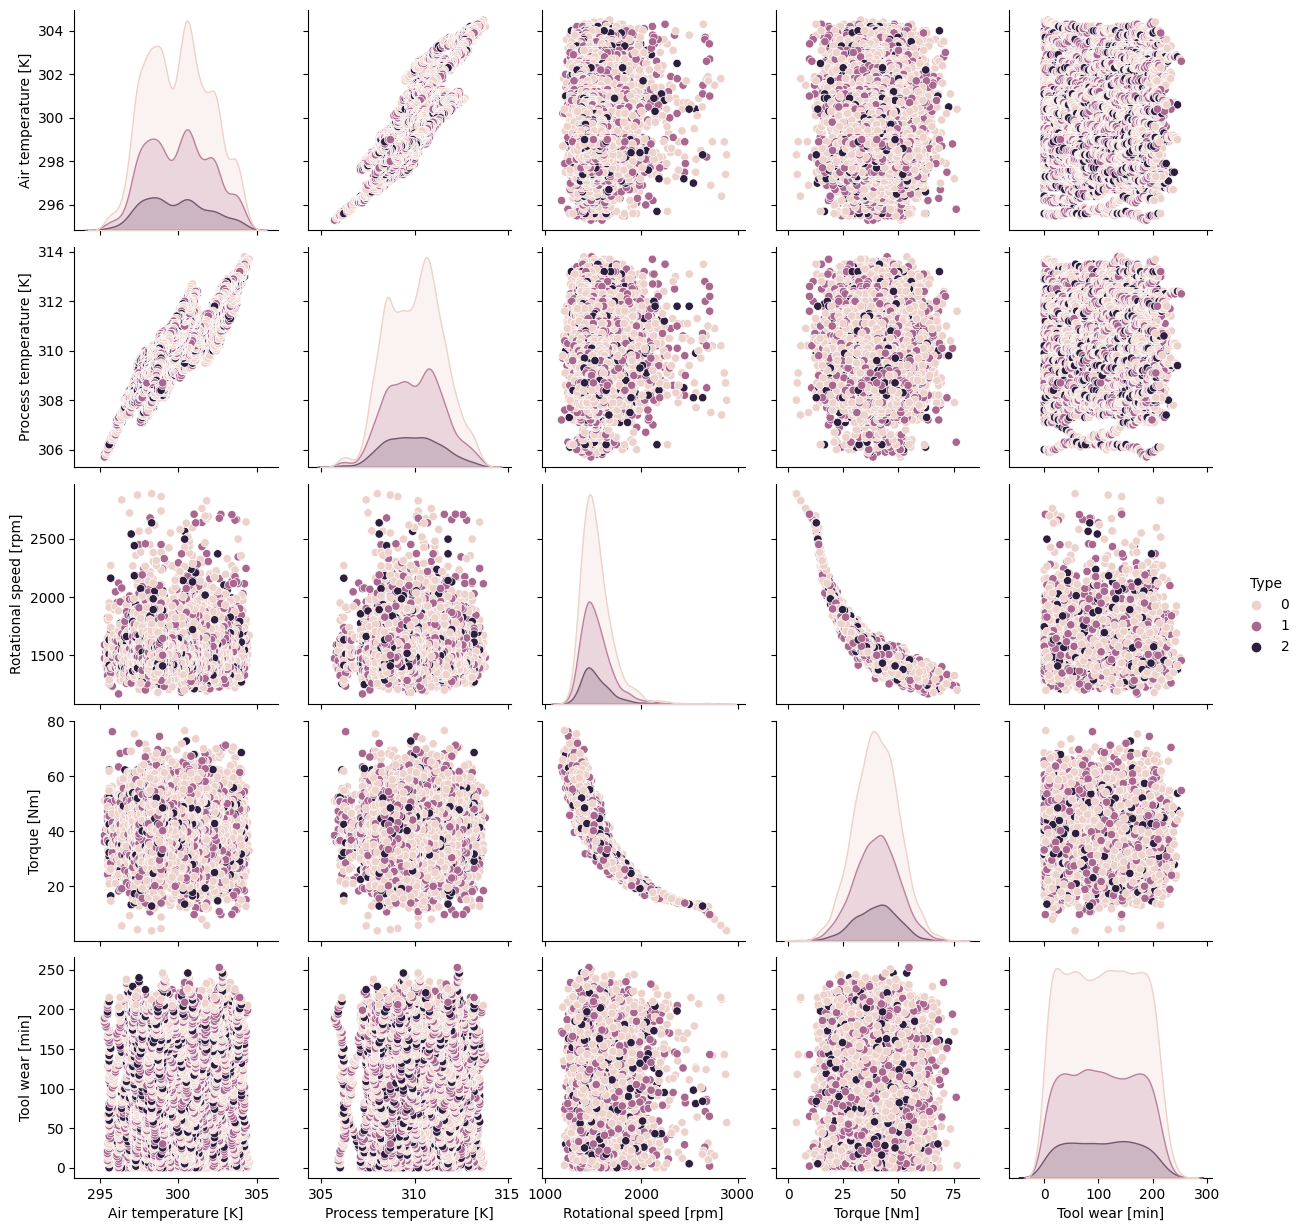

In [10]:
# Plot visualizations of the data and their correlations with the target variable

numeric_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','Type']
sns.pairplot(df.loc[:,numeric_cols],hue="Type",diag_kind='kde',kind='scatter')
plt.show()
    


# Feature Engineering

- We now analyse the correlation between the features and the target variable 'Machine failure'. We find that the 'Tool wear [min]' column has the highest correlation with the target variable. We also find that the 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]' columns have a high correlation with the target variable.

    

In [12]:
# Standardize the data 
from sklearn.preprocessing import MinMaxScaler
X = df.drop('Type', axis=1)
y = df['Type']

print(X.shape, y.shape)



# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
    

 # Print the shapes of the training and testing sets and top 5 rows of the training set , X_train, y_train and X_test, y_test
print("----Training Data ----")
print(X_train.shape, y_train.shape)
print("----Test Data ----")
print(X_test.shape, y_test.shape)

for i in range(5):
    print("Training Set:", X_train[i], y_train.iloc[i])
    print("Testing Set:", X_test[i], y_test.iloc[i])
    




(10000, 11) (10000,)
----Training Data ----
(7000, 11) (7000,)
----Test Data ----
(3000, 11) (3000,)
Training Set: [-1.04701961 -0.60267611 -0.54145587  1.03051997 -1.30583543 -0.17971122
 -0.0656061  -0.10050378 -0.09605842 -0.09681295 -0.04476615] 0
Testing Set: [ 1.1074301   1.0105289   0.04873445 -0.75987461 -0.41449086 -0.17971122
 -0.0656061  -0.10050378 -0.09605842 -0.09681295 -0.04476615] 0
Training Set: [ 0.40598135  0.94331203  1.74135573 -1.78009946 -0.85234433 -0.17971122
 -0.0656061  -0.10050378 -0.09605842 -0.09681295 -0.04476615] 1
Testing Set: [-1.09712309 -1.87979674 -1.04812869  1.63065223  1.03980817 -0.17971122
 -0.0656061  -0.10050378 -0.09605842 -0.09681295 -0.04476615] 0
Training Set: [ 0.85691269  0.40557702  0.03203095  0.21033921 -0.61777997 -0.17971122
 -0.0656061  -0.10050378 -0.09605842 -0.09681295 -0.04476615] 0
Testing Set: [ 0.65649876  0.27114327 -0.21295371 -0.01971149  1.24309728 -0.17971122
 -0.0656061  -0.10050378 -0.09605842 -0.09681295 -0.04476615

## Model Building

### Linear Regression

- Linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

- The mathematical equation for linear regression is:

$$y = \beta_0 + \beta_1x$$

- The goal of linear regression is to find the best fit line for the data. The best fit line is the line that has the least error. The error is the difference between the actual value and the predicted value. The error is calculated using the mean squared error function.

- The mean squared error function is:

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$$  


### Logistic Regression 

- Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

- The mathematical equation for logistic regression is:

$$\frac{1}{1+e^{-z}}$$

- The goal of logistic regression is to find the best fit line for the data. The best fit line is the line that has the least error. The error is the difference between the actual value and the predicted value. The error is calculated using the mean squared error function.

- The mean squared error function is:

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$$


### Naive Bayes

- Naive Bayes is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.


- The mathematical equation for naive bayes is:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

- The goal of naive bayes is to find the best fit line for the data. The best fit line is the line that has the least error. The error is the difference between the actual value and the predicted value. The error is calculated using the mean squared error function.

- The mean squared error function is:

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$$








Training Accuracy    : 59.46 %
Model Accuracy Score : 61.27 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.61      1.00      0.76      1838
           1       0.00      0.00      0.00       873
           2       0.00      0.00      0.00       289

    accuracy                           0.61      3000
   macro avg       0.20      0.33      0.25      3000
weighted avg       0.38      0.61      0.47      3000

--------------------------------------------------------


Text(0.5, 1.0, 'Confusion Matrix')

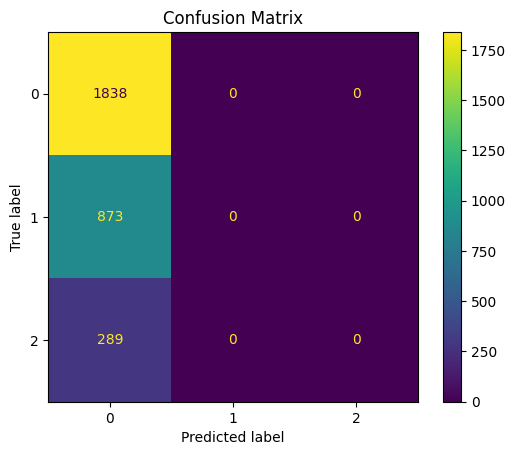

In [37]:
# Train a Logistic Regression model

# TODO: Train a logistic regression model 

# lr : Logistic Regression model  , y_pred_lr : Predicted values of y_test 
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


# Evaluation metrics

y_pred_lr = lr.predict(X_test)
log_train = round(lr.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr,zero_division=0))
print("\033[1m--------------------------------------------------------\033[0m")
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.title('Confusion Matrix')

Training Accuracy    : 31.9 %
Model Accuracy Score : 30.43 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.68      0.04      0.08      1838
           1       0.29      0.96      0.45       873
           2       0.05      0.00      0.01       289

    accuracy                           0.30      3000
   macro avg       0.34      0.33      0.18      3000
weighted avg       0.50      0.30      0.18      3000

--------------------------------------------------------


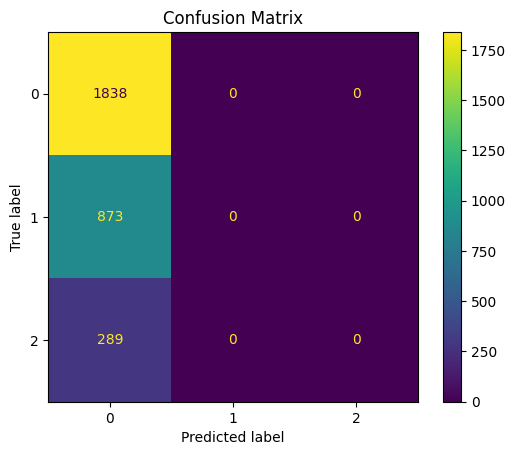

In [40]:
# Implement a Naive Bayes Classifier

"TODO: Train a Naive Bayes model and print the model's coefficients and intercept use lr as the model name "

" gnb : Naive Bayes Model  , y_pred_gnb : Predicted values of y_test "
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)


gnb_train = round(gnb.score(X_train, y_train) * 100, 2)

gnb_accuracy = round(accuracy_score(y_pred_gnb, y_test) * 100, 2)

print("Training Accuracy    :",gnb_train ,"%")
print("Model Accuracy Score :",gnb_accuracy ,"%")

print("\033[1m--------------------------------------------------------\033[0m")

print("Classification_Report: \n",classification_report(y_test,y_pred_gnb))

print("\033[1m--------------------------------------------------------\033[0m")

"Could not import: plot_confusion_matrix(gnb, X_test, y_test). It seems to be depricated "
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.title('Confusion Matrix')

cm = confusion_matrix(y_test, y_pred_gnb)





In [49]:
# Compare the results of the models

results = {'Linear Regression': [log_accuracy, log_train]}
results['Naive Bayes'] = [gnb_accuracy, gnb_train]
results_df = pd.DataFrame(results, index=['Accuracy', 'Training Accuracy']).T
results_df


,Accuracy,Training Accuracy
Linear Regression,61.27,59.46
Naive Bayes,30.43,31.90
